A.1

A2

B1

B2

B3

C1

C2

C3

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('churn_clean.csv')
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [3]:
df.rename(columns={'Item1':'TimelyResponse','Item2':'Fixes','Item3':'Replacements','Item4':'Reliability','Item5':'Options','Item6':'Respecfulness','Item7':'Courteous','Item8':'Listening'}, inplace=True)


In [4]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respecfulness,Courteous,Listening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [5]:
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respecfulness,Courteous,Listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [6]:
df=df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
                            'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 
                            'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])

In [7]:
df.isnull().sum()

Children                0
Age                     0
Income                  0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
Fixes                   0
Replacements            0
Reliability             0
Options                 0
Respecfulness           0
Courteous               0
Listening               0
dtype: int64

In [8]:
df

,Children,Age,Income,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,Fixes,Replacements,Reliability,Options,Respecfulness,Courteous,Listening
0,0,68,28561.99,Male,No,7.978323,10,0,1,No,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,1,27,21704.77,Female,Yes,11.699080,12,0,1,Yes,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,4,50,9609.57,Female,No,10.752800,9,0,1,Yes,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,1,48,18925.23,Male,No,14.913540,15,2,0,Yes,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,0,83,40074.19,Male,Yes,8.147417,16,2,1,No,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,Male,No,9.415935,12,2,0,No,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,4,48,34129.34,Male,No,6.740547,15,2,0,No,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,1,48,45983.43,Female,No,6.590911,10,0,0,No,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,1,39,16667.58,Male,No,12.071910,14,1,0,No,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [9]:
df.dtypes

Children                  int64
Age                       int64
Income                  float64
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBackup             object
DeviceProtection         object
TechSupport              object
StreamingTV              object
StreamingMovies          object
PaperlessBilling         object
Tenure                  float64
MonthlyCharge           float64
Bandwidth_GB_Year       float64
TimelyResponse            int64
Fixes                     int64
Replacements              int64
Reliability               int64
Options                   int64
Respecfu

In [10]:
df=pd.get_dummies(df)

In [11]:
df

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
0,0,68,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110,...,1,0,1,0,1,0,0,1,0,1
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766,...,1,0,1,0,0,1,0,1,0,1
2,4,50,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961,...,1,0,1,0,1,0,0,1,0,1
3,1,48,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412,...,1,0,1,0,0,1,1,0,0,1
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436,...,1,0,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3,23,55723.74,9.415935,12,2,0,68.197130,159.979400,6511.252601,...,0,1,1,0,1,0,1,0,1,0
9996,4,48,34129.34,6.740547,15,2,0,61.040370,207.481100,5695.951810,...,0,1,1,0,0,1,1,0,1,0
9997,1,48,45983.43,6.590911,10,0,0,47.416890,169.974100,4159.305799,...,1,0,1,0,1,0,1,0,0,1
9998,1,39,16667.58,12.071910,14,1,0,71.095600,252.624000,6468.456752,...,1,0,0,1,0,1,0,1,0,1


In [12]:
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,PaperlessBilling_No,PaperlessBilling_Yes
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.561400,0.438600,0.625000,0.375000,0.507100,0.492900,0.511000,0.489000,0.411800,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.496241,0.496241,0.484147,0.484147,0.499975,0.499975,0.499904,0.499904,0.492184,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respecfulness', 'Courteous', 'Listening', 'Gender_Female',
       'Gender_Male', 'Gender_Nonbinary', 'Churn_No', 'Churn_Yes', 'Techie_No',
       'Techie_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_No', 'Port_modem_Yes', 'Tablet_No',
       'Tablet_Yes', 'InternetService_DSL', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_No', 'Phone_Yes', 'Multiple_No',
       'Multiple_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'PaperlessBilling_No', 'Paper

In [14]:
df=df.drop(columns=['Gender_Female','Gender_Nonbinary', 'Churn_No', 'Techie_No','Contract_Month-to-month', 'Contract_One year','Port_modem_No', 'Tablet_No','InternetService_DSL','InternetService_None','Phone_No','Multiple_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No','PaperlessBilling_No'])
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,...,InternetService_Fiber Optic,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes
count,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,...,0.440800,0.906700,0.460800,0.357600,0.450600,0.438600,0.375000,0.492900,0.489000,0.588200
std,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,...,0.496508,0.290867,0.498486,0.479317,0.497579,0.496241,0.484147,0.499975,0.499904,0.492184
min,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141369,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respecfulness', 'Courteous', 'Listening', 'Gender_Male', 'Churn_Yes',
       'Techie_Yes', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes'],
      dtype='object')

In [16]:
df.dtypes

Children                         int64
Age                              int64
Income                         float64
Outage_sec_perweek             float64
Email                            int64
Contacts                         int64
Yearly_equip_failure             int64
Tenure                         float64
MonthlyCharge                  float64
Bandwidth_GB_Year              float64
TimelyResponse                   int64
Fixes                            int64
Replacements                     int64
Reliability                      int64
Options                          int64
Respecfulness                    int64
Courteous                        int64
Listening                        int64
Gender_Male                      uint8
Churn_Yes                        uint8
Techie_Yes                       uint8
Contract_Two Year                uint8
Port_modem_Yes                   uint8
Tablet_Yes                       uint8
InternetService_Fiber Optic      uint8
Phone_Yes                

In [17]:
df = df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options',
       'Respecfulness', 'Courteous', 'Listening', 'Gender_Male',
       'Techie_Yes', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'Churn_Yes']]

C4

In [18]:
df.to_csv('df_prepared.csv')

In [19]:
df= pd.read_csv('df_prepared.csv')

D1

In [20]:
X = df.drop('Churn_Yes', axis=1).values
y = df['Churn_Yes'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [22]:
knn = KNeighborsClassifier(n_neighbors=8)

In [23]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [24]:
y_pred = knn.predict(X_test)

D2

In [25]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2585  311]
 [ 783  321]]
              precision    recall  f1-score   support

           0       0.77      0.89      0.83      2896
           1       0.51      0.29      0.37      1104

    accuracy                           0.73      4000
   macro avg       0.64      0.59      0.60      4000
weighted avg       0.70      0.73      0.70      4000



In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {'n_neighbors': np.arange(1,50)}

In [28]:
knn_cv = GridSearchCV(knn, param_grid, cv=5)

In [29]:
knn_cv.fit(X,y)
knn_cv.best_params_
knn_cv.best_score_

0.5402

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_test, y_pred)

0.7265

AttributeError: 'Text' object has no property 'roation'

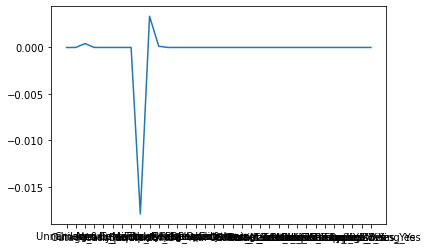

In [33]:
from sklearn.linear_model import Lasso
names= df.drop('Churn_Yes', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_
lasso_coef = plt.plot(range(len(names)), lasso_coef)
lasso_coef = plt.xticks(range(len(names)), names, roation=60)
lasso_coef = plt.ylabel('Coefficients')
plt.show()